# King County Housing Sale Price Analysis

* Student name: Tim Rabbitt 
* Student pace: self paced
* Scheduled project review date/time: 8/30/22 11:00AM
* Instructor name: Claude Fried



## Business Understanding:

The housing market is booming and the demand to create more housing is higher than ever. I have been tasked by Kraken Construction, a new housing developer in King County, WA to assess the local housing market and identify the features that most influence home sale price. 

**Stakeholder:**  Kraken Construction

**Business Problem:** Housing developers would like to build homes including features that will contribute to a higher sale price of the home.

**Business Question:** What features should you consider when building a new home that would ultimately lead to a higher sale price?

Performing multiple linear regression on past home sales can show how strong of a relationship there is between the sale price of a home and a particular feature. Knowing these features can provide insight and confidence that your new construction will not only be a desirable build but one that will sell at a price you feel comfortable with.

## Data Understanding

The project utilizes data from the King County House Sales dataset. This dataset was provided to us at the onset of analysis and contains home sale information from 2014 to 2015 in King County, WA.  This dataset contains 21,597 homes and 21 features, including:

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
* `grade` - Overall grade of the house. Related to the construction and design of the house.
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

Further information on this dataset can be found at the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) 

## Data Preprocessing

In [1]:
# Importing libraries

import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Importing dataframe and viewing first 5 rows

df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# Investigating number of rows and columns

df.shape

(21597, 21)

In [4]:
# Investigating value counts and dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
# How many Nan values does our dataset contain

df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Considering the business problem at hand, certain features can automatically be removed from the dataframe because they cannot be included in the construction of a new home:

* `id`
* `date`
* `condition`
* `yr_built`
* `yr_renovated`

We will start by removing these unwanted columns from the data frame.

In [6]:
df = df.drop(['id', 'date', 'condition', 'yr_built', 'yr_renovated'], axis=1)

Next, we will want to convert all object Dtypes to numeric.

In [7]:
# Investigating grade value counts

df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [8]:
# Replacing grade with numerical values

df['grade'].replace(to_replace= {'3 Poor': 3, '4 Low': 4, '5 Fair': 5, '6 Low Average': 6, '7 Average': 7,
                       '8 Good': 8, '9 Better': 9, '10 Very Good': 10, '11 Excellent': 11, '12 Luxury': 12, 
                        '13 Mansion': 13}, inplace = True)
df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [9]:
# Investigating water front value counts

df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [10]:
# Replacing NO and YES with 0 and 1 respectively 

df['waterfront'].replace({'NO': 0, 'YES': 1}, inplace=True)
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [11]:
# Replacing Nan values with 0

df['waterfront'].fillna(df['waterfront'].mode()[0], inplace=True)

In [12]:
# Investigating waterfront value counts

df['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [13]:
# Investigating view value counts

df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [14]:
# Replacing view with numerical values

df['view'].replace(to_replace={'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 4}, inplace=True)

We did notice that view had 63 Nan values. Because this is a categorical feature, we will fill these missing values with the mode of the column.

In [15]:
# Replacing Nan values with mode (NONE)

df['view'].fillna(df['view'].mode()[0], inplace=True)

In [16]:
# Investigating view value counts

df['view'].value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

Grade, view, and waterfront are all numeric Dtypes and all have a non-null count of 21597.

In [17]:
# No Nan values in the dataframe

df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
grade            0
sqft_above       0
sqft_basement    0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   view           21597 non-null  float64
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  object 
 11  zipcode        21597 non-null  int64  
 12  lat            21597 non-null  float64
 13  long           21597 non-null  float64
 14  sqft_living15  21597 non-null  int64  
 15  sqft_lot15     21597 non-null  int64  
dtypes: float64(7), int64(8), object(1)
memory usage: 2.6+ MB


Sqft_basement is the only feature that is not numeric. Let's look into why that is the case.

In [19]:
# Investigating why sqft_basement is object Dtype

df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1852.0        1
415.0         1
1481.0        1
2240.0        1
518.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [20]:
#Replacing ? with 0.0

df['sqft_basement'].replace('?', 0, inplace=True)

In [21]:
# Changing sqft_basement Dtype

df['sqft_basement'] = df['sqft_basement'].astype(float).astype(int)

In [22]:
# All columns are now numerice Dtype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   view           21597 non-null  float64
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  int64  
 11  zipcode        21597 non-null  int64  
 12  lat            21597 non-null  float64
 13  long           21597 non-null  float64
 14  sqft_living15  21597 non-null  int64  
 15  sqft_lot15     21597 non-null  int64  
dtypes: float64(7), int64(9)
memory usage: 2.6 MB


Now that we have cleaned our dataframe of Nan values and object Dtypes, we will now investigate correlations between features and our target variable price.

## Exploring Features

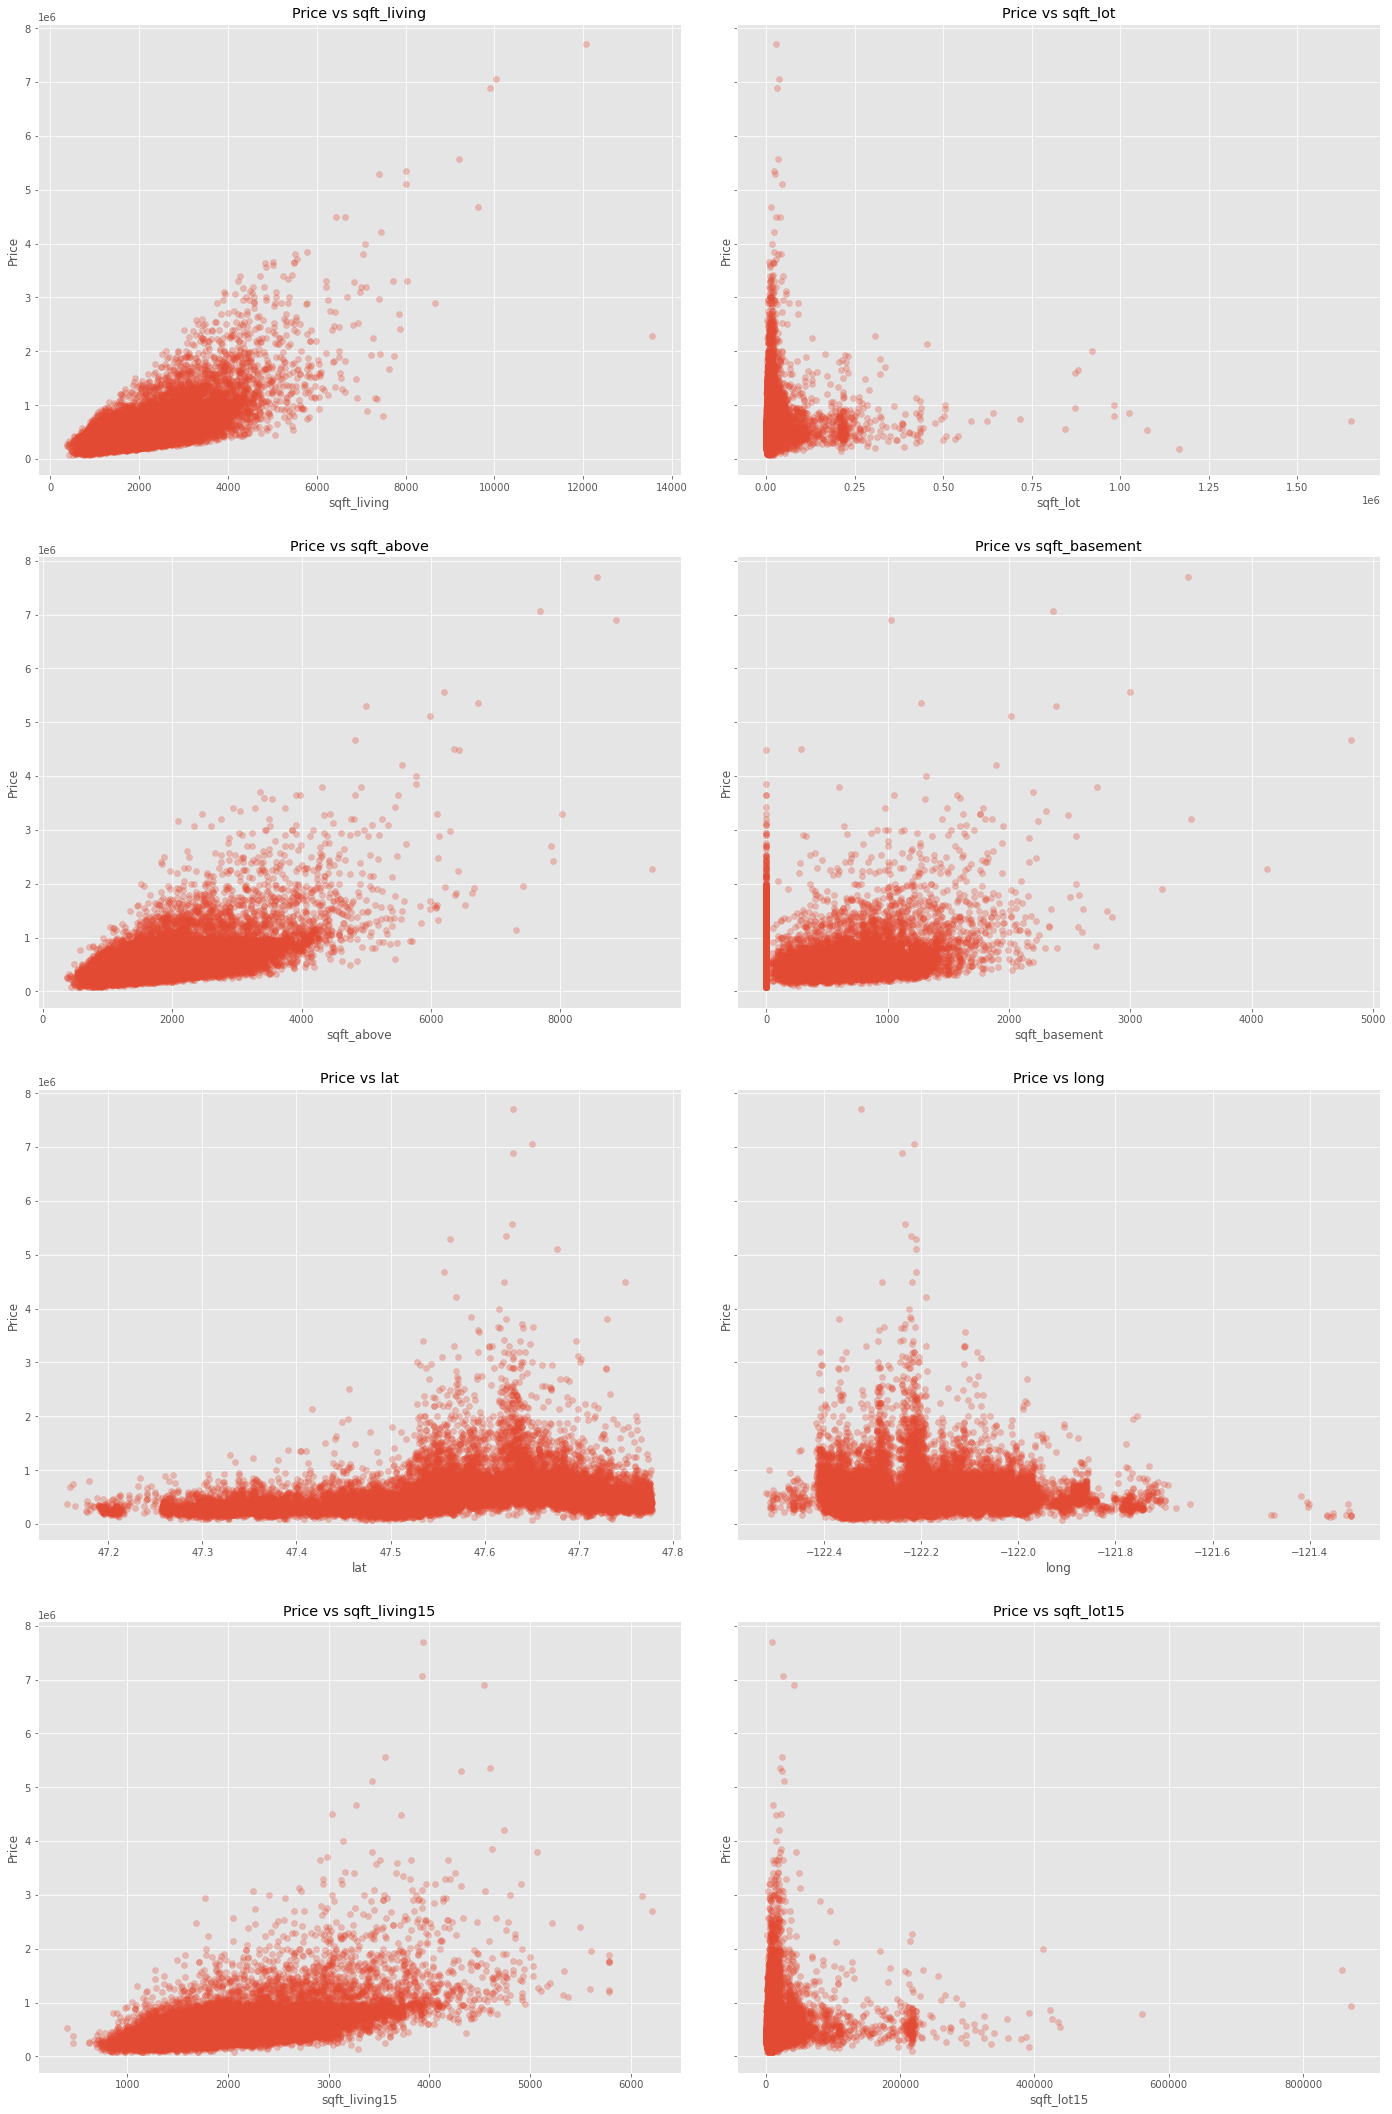

In [23]:
# Plotting scatter plots for all continuous features

continuous = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
fig, axes = plt.subplots(4, 2, figsize=(20,30), sharey=True)
for ax, column in zip(axes.flatten(), df[continuous]):
    ax.scatter(df[column], df['price'], label=column, alpha=0.3)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price')
fig.tight_layout(pad=3.0)

### Observations on Scatterplots:
* All of the sqft continuous features have a linear relationship with price. 
* Sqft_basement appears to have a lot of 0 values, which I would assume indicates the home did not have a basement to record. 
* While certain long and lat influence sale price, for the sake of this exploration these features will be dropped.
* There seems to be several outliers in home sale price. Because there doesn't appear to be any obvious low outliers, we will use >99 percentile (>3 standard deviations from the mean) as an outlier range that will be dropped from the dataframe.
* There doesn't seem to be a strong relationship between sqft_lot/sqft_lot15 and price. There are many homes with small lots that sell for a higher price than those with large lots. These features will be dropped moving forward.
* We will remove the features listed above and and filter sale price for outliers, then revisit scatterplots.

In [24]:
# Dropping unwated columns from dataframe

df = df.drop(['lat', 'long', 'sqft_lot', 'sqft_lot15'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,zipcode,sqft_living15
0,221900.0,3,1.00,1180,1.0,0.0,0.0,7,1180,0,98178,1340
1,538000.0,3,2.25,2570,2.0,0.0,0.0,7,2170,400,98125,1690
2,180000.0,2,1.00,770,1.0,0.0,0.0,6,770,0,98028,2720
3,604000.0,4,3.00,1960,1.0,0.0,0.0,7,1050,910,98136,1360
4,510000.0,3,2.00,1680,1.0,0.0,0.0,8,1680,0,98074,1800


Skewness: 4.023364652271239
Kurtosis: 34.54135857673376


/Users/rabbitt/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


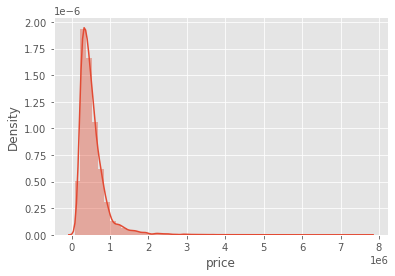

In [25]:
# Viewing price histogram for outlier visualization 

sns.distplot(df['price'])
print('Skewness:', df['price'].skew())
print('Kurtosis:', df['price']. kurt())

In [26]:
# Building a function to remove outliers

def removeOutliers(data, col):
    upper_range = np.quantile(data[col], 0.99)
    df.drop((df[df[col] > upper_range].index), inplace = True)

In [27]:
# Removing outliers in price column

removeOutliers(df, 'price')

/Users/rabbitt/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 1.7404854434423793
Kurtosis: 4.106726238973909


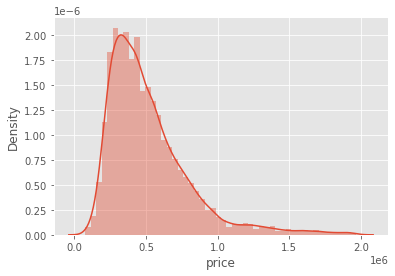

In [28]:
# Plotting new price histogram

sns.distplot(df['price'])
print('Skewness:', df['price'].skew())
print('Kurtosis:', df['price']. kurt())

In [29]:
# Inspecting df after price outlier removal

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21383 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21383 non-null  float64
 1   bedrooms       21383 non-null  int64  
 2   bathrooms      21383 non-null  float64
 3   sqft_living    21383 non-null  int64  
 4   floors         21383 non-null  float64
 5   waterfront     21383 non-null  float64
 6   view           21383 non-null  float64
 7   grade          21383 non-null  int64  
 8   sqft_above     21383 non-null  int64  
 9   sqft_basement  21383 non-null  int64  
 10  zipcode        21383 non-null  int64  
 11  sqft_living15  21383 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 2.1 MB


By removing outliers in our home sale price column we now have a non-null count of 21383, down from our original count of 21597.

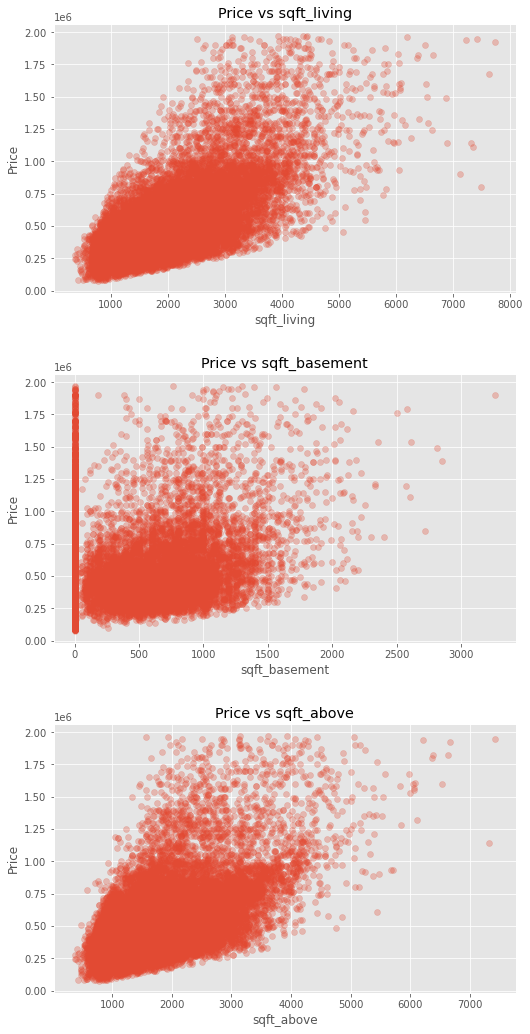

In [30]:
# Plotting sqft parameters after outlier removal

continuous = ['sqft_living', 'sqft_basement', 'sqft_above']
fig, axes = plt.subplots(3, 1, figsize=(8,15), sharey=True)
for ax, column in zip(axes.flatten(), df[continuous]):
    ax.scatter(df[column], df['price'], label=column, alpha=0.3)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price')
fig.tight_layout(pad=3.0)

Removing price outliers helped to make the linear relationships more obvious. Next, I would like to see how correlated features are with each other.

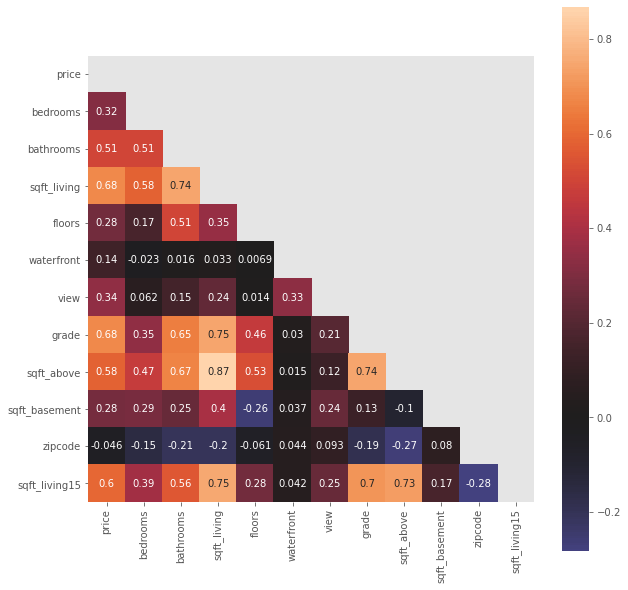

In [31]:
#Building correlation heatmap

fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(df.corr(), center=0, square=True, annot=True, mask=np.triu(np.ones_like(df.corr(), dtype=bool)))

Sqft_living and sqft_above have a strong positive correlation with a value of .87. We can also see features that have strong positive correlations around .75. We will use a correlation coefficient of >.75 between two variables as a limit to avoid multicollinearity in our model. As a result, we will drop sqft_above as a feature in our model. Any other violations in our independence assumption for regression will be dealt with accordingly in our modeling iterations. 


### Bathrooms

In [32]:
#Investigating bathroom value counts

df['bathrooms'].value_counts()

2.50    5358
1.00    3851
1.75    3046
2.25    2041
2.00    1929
1.50    1445
2.75    1180
3.00     735
3.50     710
3.25     555
3.75     141
4.00     115
4.50      87
0.75      71
4.25      59
5.00      16
4.75      10
1.25       9
5.25       9
5.50       4
0.50       4
5.75       3
6.00       2
7.50       1
6.75       1
6.50       1
Name: bathrooms, dtype: int64

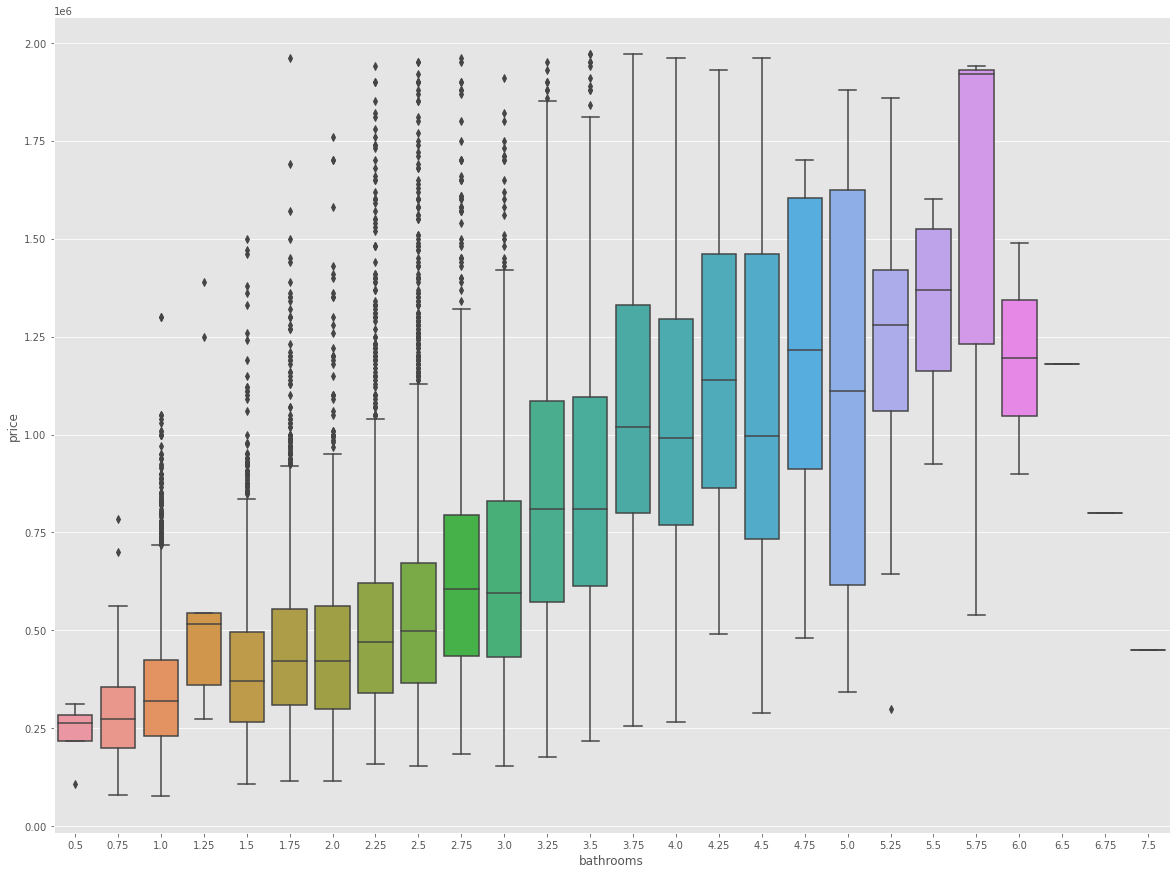

In [33]:
# Viewing bathrooms boxplot 

fig, ax = plt.subplots(figsize=(20,15))
ax = sns.boxplot(x=df['bathrooms'], y=df['price']);

Looking at the boxplot above, there is an obvious positive correlation between the number of bathrooms and home sale price. There is an overall trend in the mean sale price with each additional .25 bathrooms.

### Bedrooms

In [34]:
# Investigating bedrooms value counts
df['bedrooms'].value_counts()

3     9789
4     6786
2     2758
5     1540
6      259
1      196
7       33
8       11
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

We have a home with 33 bedrooms which is a clear outlier that we will drop from our dataset.

In [35]:
# Removing bedroom outlier

df.drop((df[df['bedrooms'] == 33].index), inplace = True)

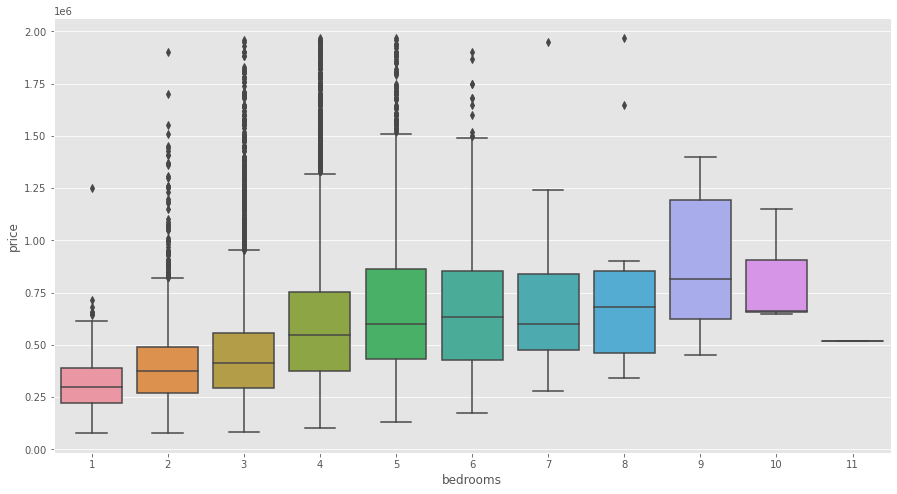

In [36]:
# Plotting boxplot for bedrooms

fig, ax = plt.subplots(figsize=(15,8))
ax = sns.boxplot(x=df['bedrooms'], y=df['price']);

The number of bedrooms does appear to influence the sale price of the house, as each additional bedroom added sees an increase in mean sale price of the home. This trend is less linear in homes with >6 bedrooms.

### View

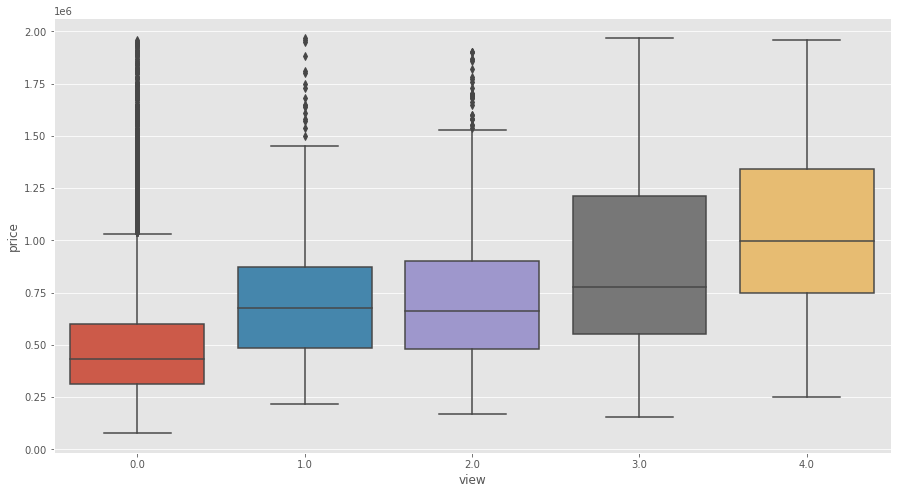

In [37]:
# Plotting view boxplot

fig, ax = plt.subplots(figsize=(15,8))
ax = sns.boxplot(x=df['view'], y=df['price']);

View does appear to positively influence sale price. We see the biggest jump in home sale price when comparing a home with no view to a 'fair' view,  as well as a 'good' view to an 'excellent' view.

In [38]:
# Converting view dytpe to int

df['view'] = df['view'].astype(int)

### Grade

In [39]:
# Investigating grade value counts

df['grade'].value_counts()

7     8972
8     6059
9     2595
6     2038
10    1070
11     324
5      242
12      53
4       27
13       1
3        1
Name: grade, dtype: int64

With a count of only 1, the two homes with a grade 13 and 3 will be dropped from the dataset. 

In [40]:
df.drop((df[df['grade'] == 13].index) | (df[df['grade'] == 3].index), inplace = True)

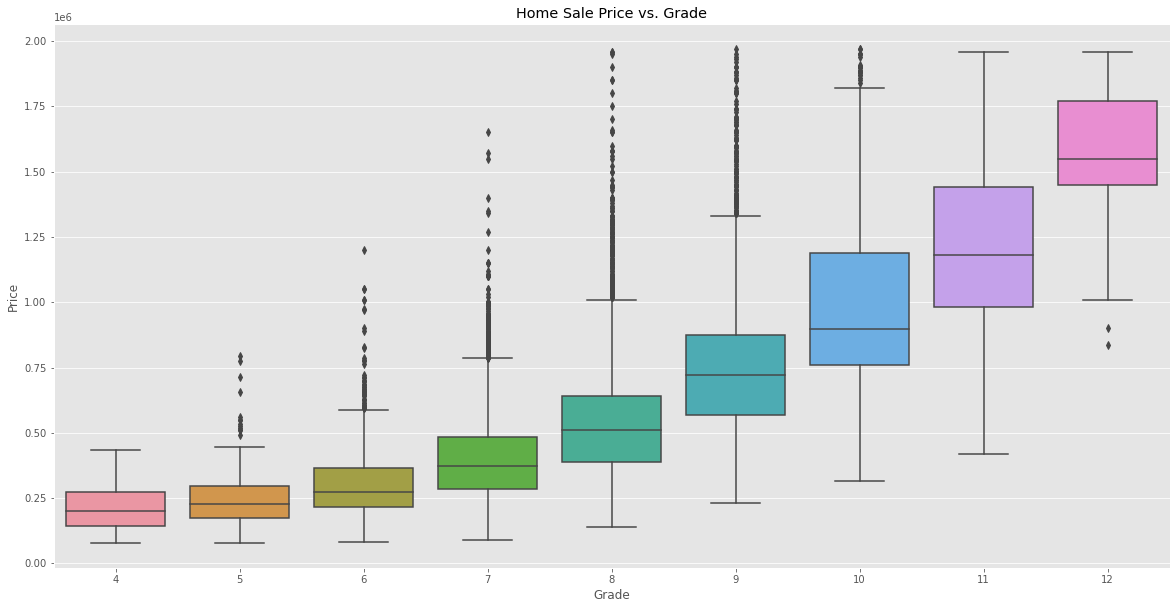

In [41]:
# Plotting grade boxplot

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.boxplot(x=df['grade'], y=df['price'])
ax.set_title('Home Sale Price vs. Grade')
ax.set_xlabel("Grade")
ax.set_ylabel("Price");

Grade has a very strong influence on home sale price, each additional increase in grade sees an increase in mean sale price.

### Floors

In [42]:
# Viewing floors value counts

df['floors'].value_counts()

1.0    10633
2.0     8095
1.5     1898
3.0      606
2.5      142
3.5        6
Name: floors, dtype: int64

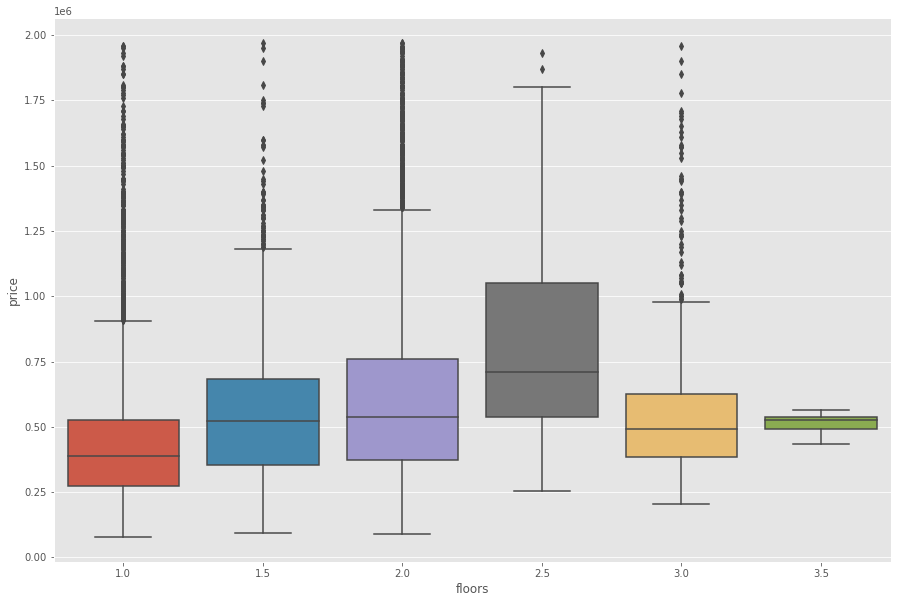

In [43]:
# Plotting floors boxplot

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.boxplot(x=df['floors'], y=df['price']);

We see an increase in average sale price for each additional floor added up to 2.5 floors. Homes that have >2.5 floors see a decrease in average sale price.

### Waterfront

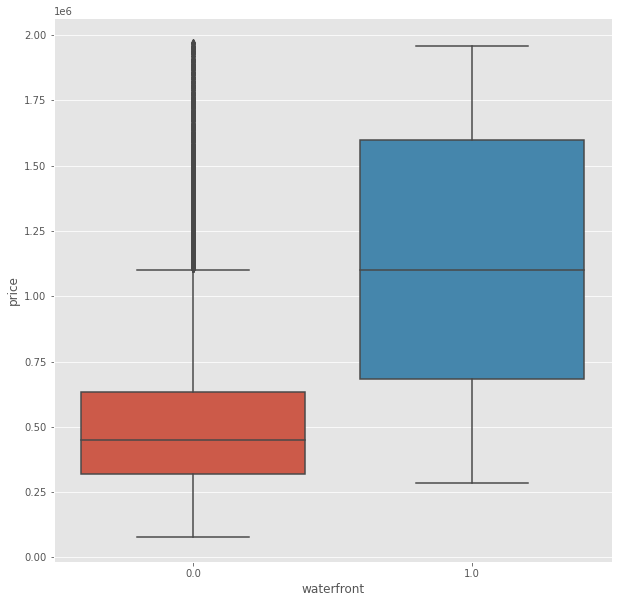

In [44]:
# Plotting waterfront boxplot

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.boxplot(x=df['waterfront'], y=df['price']);

There is an obvious increase in average sale price in homes that are on a waterfront compared to those that are not.

# Modeling

The dataset has been cleaned of object Dtypes, Nan values/missing data has either been removed or replaced, and outliers have been addressed. We have looked at the correlations between our features and price, as well as correlations between the features themselves. To begin our modeling we will create a new dataframe consisting of our selected features that we will use to produce our model.

In [45]:
# Selecting features to be included in our model 

features_df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_living15', 'sqft_basement', 'floors', 'waterfront', 'view', 'grade']]
features_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_living15,sqft_basement,floors,waterfront,view,grade
0,221900.0,3,1.00,1180,1340,0,1.0,0.0,0,7
1,538000.0,3,2.25,2570,1690,400,2.0,0.0,0,7
2,180000.0,2,1.00,770,2720,0,1.0,0.0,0,6
3,604000.0,4,3.00,1960,1360,910,1.0,0.0,0,7
4,510000.0,3,2.00,1680,1800,0,1.0,0.0,0,8


In [46]:
# Creating dummy variables

grade_dummies = pd.get_dummies(features_df['grade'], prefix = 'grade', drop_first = True)
view_dummies = pd.get_dummies(features_df['view'], prefix = 'view', drop_first = True)
features_df = pd.concat([features_df.drop(['grade', 'view'], axis=1), grade_dummies, view_dummies], axis=1)
features_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_living15,sqft_basement,floors,waterfront,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,view_1,view_2,view_3,view_4
0,221900.0,3,1.00,1180,1340,0,1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570,1690,400,2.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,2720,0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,1360,910,1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,1800,0,1.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0


In [47]:
# Exploring correlations between our chosen features and our target variable price

features_corrs = features_df.corr()['price'].map(abs).sort_values(ascending = False)
features_corrs

price            1.000000
sqft_living      0.678685
sqft_living15    0.601919
bathrooms        0.507879
grade_10         0.378373
grade_7          0.346117
bedrooms         0.323524
grade_9          0.317623
grade_11         0.306865
sqft_basement    0.282124
floors           0.278960
grade_6          0.246492
view_4           0.206697
view_3           0.193006
grade_12         0.180586
view_2           0.157314
waterfront       0.141734
grade_5          0.101285
view_1           0.095279
grade_8          0.050089
Name: price, dtype: float64

## Baseline Model

Based on our correlation coefficients above, it appears that sqft_living has the highest influence on price. We will produce our baseline model using sqft_living as our only variable.

In [48]:
# Creating our baseline model with sqft_living as the only feature

from statsmodels.tools.tools import add_constant

y_target = features_df['price']
X_baseline = features_df['sqft_living']


Xc = add_constant(X_baseline)
model = sm.OLS(y_target, Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                 1.826e+04
Date:                Mon, 29 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:01:26   Log-Likelihood:            -2.9229e+05
No. Observations:               21380   AIC:                         5.846e+05
Df Residuals:                   21378   BIC:                         5.846e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.747e+04   3700.277     15.530      0.000    5.02e+04    6.47e+04
sqft_living   224.7432      1.663    135.114      0.000     221.483     228.004
==============================================================================
Omnibus:                     5164.250   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16524.807
Skew:                           1.227   Prob(JB):                         0.00
Kurtosis:                       6.539   Cond. No.                     5.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Linearity

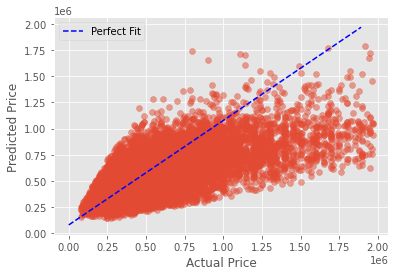

In [49]:
preds = model.predict(Xc)
fig, ax = plt.subplots()

perfect_line = np.arange(y_target.min(), y_target.max())
ax.plot(perfect_line, linestyle="--", color="blue", label="Perfect Fit")
ax.scatter(y_target, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

Considering our earlier observations on the linear relationship between sqft_living and price as well as looking at the scatter plot above, we can say that our baseline model **passes the linearity assumption**.

### Normality

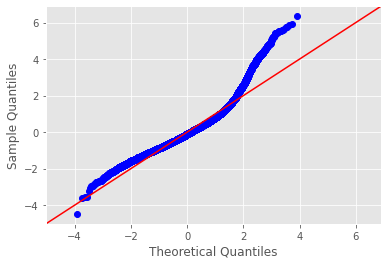

In [50]:
residuals = (y_target - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

Looking at the Q-Q plot above our baseline model **does not pass the normality assumption**.

### Homoscedasticity

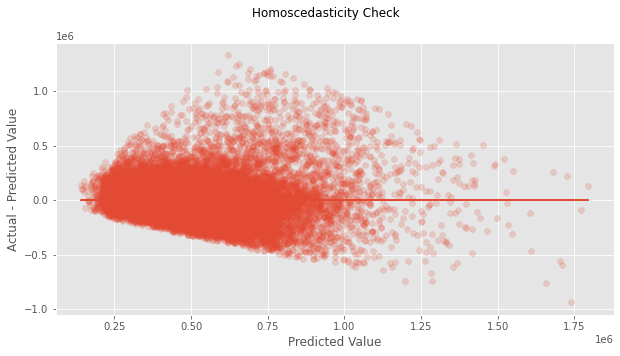

In [51]:
residuals = model.resid
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle('Homoscedasticity Check')
ax.scatter(preds, residuals, alpha=0.2)
ax.plot(preds, [0 for i in range(len(Xc))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

In [52]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_target, Xc)
list(zip(name, test))

[('F statistic', 1.0277197950781383), ('p-value', 0.07878086342310361)]

Based on the plot above and the Goldfeld-Quandt test (p-value of 0.07) the baseline model **does not pass the homoscedasticity assumption**.

## Model #2

Our second model will include all selected features. We see an improvement in our model performance based on our R-squared value which increased to 58.5 percent. 

In [53]:
# Creating Model 2 including all selected features

y_target = features_df['price']
X_features = features_df.drop('price', axis=1)


Xc = add_constant(X_features)
model2 = sm.OLS(y_target, Xc).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     1588.
Date:                Mon, 29 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:01:28   Log-Likelihood:            -2.8947e+05
No. Observations:               21380   AIC:                         5.790e+05
Df Residuals:                   21360   BIC:                         5.791e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9.673e+04   3.58e+04      2.702      0.007    2.66e+04    1.67e+05
bedrooms      -6223.2944   1846.422     -3.370      0.001   -9842.421   -2604.168
bathrooms     -1.311e+04   2858.910     -4.585      0.000   -1.87e+04   -7504.458
sqft_living      84.7729      3.531     24.005      0.000      77.851      91.695
sqft_living15    29.6291      3.152      9.401      0.000      23.451      35.807
sqft_basement    74.3088      3.922     18.948      0.000      66.622      81.996
floors          2.13e+04   3205.112      6.646      0.000     1.5e+04    2.76e+04
waterfront     2.634e+05   2.15e+04     12.232      0.000    2.21e+05    3.06e+05
grade_5        1.913e+04   3.73e+04      0.513      0.608    -5.4e+04    9.22e+04
grade_6        5.714e+04   3.56e+04      1.603      0.109   -1.27e+04    1.27e+05
grade_7        1.028e+05   3.55e+04      2.895      0.004    3.32e+04    1.72e+05
grade_8        1.779e+05   3.57e+04      4.989      0.000    1.08e+05    2.48e+05
grade_9        3.184e+05    3.6e+04      8.853      0.000    2.48e+05    3.89e+05
grade_10       4.712e+05   3.65e+04     12.922      0.000       4e+05    5.43e+05
grade_11       6.112e+05   3.79e+04     16.145      0.000    5.37e+05    6.85e+05
grade_12       8.289e+05   4.48e+04     18.488      0.000    7.41e+05    9.17e+05
view_1          1.28e+05   1.05e+04     12.193      0.000    1.07e+05    1.49e+05
view_2         8.635e+04   6310.389     13.683      0.000     7.4e+04    9.87e+04
view_3         1.377e+05   8741.240     15.754      0.000    1.21e+05    1.55e+05
view_4         2.247e+05    1.4e+04     16.083      0.000    1.97e+05    2.52e+05
==============================================================================
Omnibus:                     4875.865   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17358.570
Skew:                           1.123   Prob(JB):                         0.00
Kurtosis:                       6.800   Cond. No.                     2.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Linearity

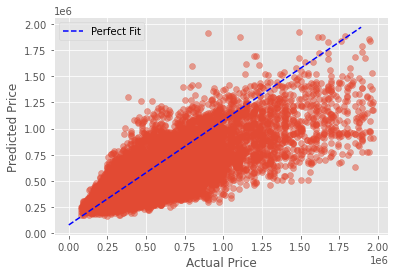

In [54]:
preds = model2.predict(Xc)
fig, ax = plt.subplots()

perfect_line = np.arange(y_target.min(), y_target.max())
ax.plot(perfect_line, linestyle="--", color="blue", label="Perfect Fit")
ax.scatter(y_target, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

Model 2 **passes** the linearity assumption

### Normality

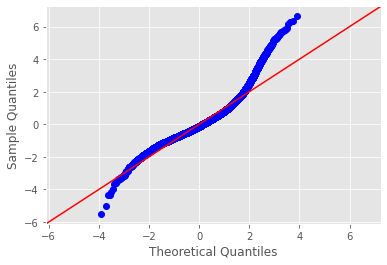

In [55]:
residuals = (y_target - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

Model 2 **does not pass** the normality assumption

### Homoscedasticity

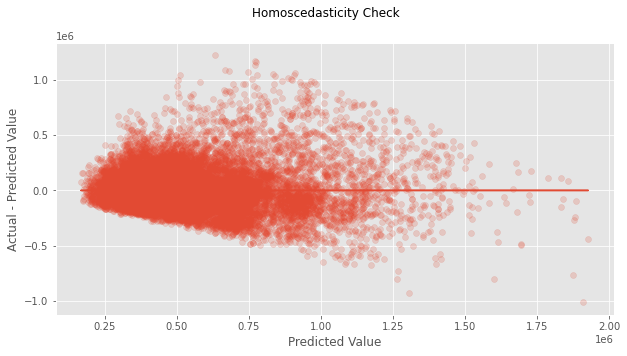

In [56]:
residuals = model2.resid
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle('Homoscedasticity Check')
ax.scatter(preds, residuals, alpha=0.2)
ax.plot(preds, [0 for i in range(len(Xc))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

In [57]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_target, Xc)
list(zip(name, test))

[('F statistic', 1.0507619104555377), ('p-value', 0.005276230661589559)]

Model 2 **passes** the homoscedasticity assumption.

Because we are introducing additional variables to our model we must address the independence assumption to linear regression.

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vifs = [vif(Xc.values, i) for i in range(len(Xc.columns))]
pd.Series(data=vifs, index=Xc.columns).sort_values(ascending=False)

const            812.025496
grade_7          194.797486
grade_8          163.680378
grade_9           87.423517
grade_6           69.417865
grade_10          40.056606
grade_11          13.556434
grade_5            9.868370
sqft_living        5.859963
grade_12           3.150084
bathrooms          2.880759
sqft_living15      2.805778
floors             1.890647
sqft_basement      1.783514
bedrooms           1.741828
view_4             1.424271
waterfront         1.381911
view_3             1.064817
view_2             1.046664
view_1             1.020377
dtype: float64

Model 2 **does not pass** the independence assumption.

## Model #3

All of our grade dummies except grade_12 had a VIF value => 10. Additionally, we saw a VIF of 5.86 for sqft_living, which points toward that feature being at least a moderate contributor to multicollinearity in our model.

In Model 3 we explore dropping some of these features in our model. Let's first revisit the correlations between our selected features and price.

In [59]:
# Exploring correlations between our chosen features and our target variable price

features_corrs = features_df.corr()['price'].map(abs).sort_values(ascending = False)
features_corrs

price            1.000000
sqft_living      0.678685
sqft_living15    0.601919
bathrooms        0.507879
grade_10         0.378373
grade_7          0.346117
bedrooms         0.323524
grade_9          0.317623
grade_11         0.306865
sqft_basement    0.282124
floors           0.278960
grade_6          0.246492
view_4           0.206697
view_3           0.193006
grade_12         0.180586
view_2           0.157314
waterfront       0.141734
grade_5          0.101285
view_1           0.095279
grade_8          0.050089
Name: price, dtype: float64

According to the coefficients above, grade_8 has the least significant correlation with price. In our third model, we will drop this feature to see if that improves our model performance. 

In [60]:
y_target = features_df['price']
X_features = features_df.drop(['price', 'grade_8'], axis=1)


Xc = add_constant(X_features)
model3 = sm.OLS(y_target, Xc).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     1673.
Date:                Mon, 29 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:01:30   Log-Likelihood:            -2.8949e+05
No. Observations:               21380   AIC:                         5.790e+05
Df Residuals:                   21361   BIC:                         5.792e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.699e+05   8800.773     30.664      0.000    2.53e+05    2.87e+05
bedrooms      -5968.2990   1846.747     -3.232      0.001   -9588.061   -2348.536
bathrooms     -1.267e+04   2859.163     -4.432      0.000   -1.83e+04   -7066.555
sqft_living      85.3682      3.531     24.174      0.000      78.446      92.290
sqft_living15    29.7101      3.154      9.421      0.000      23.529      35.891
sqft_basement    74.2164      3.924     18.914      0.000      66.525      81.908
floors         2.171e+04   3205.839      6.773      0.000    1.54e+04     2.8e+04
waterfront     2.636e+05   2.15e+04     12.234      0.000    2.21e+05    3.06e+05
grade_5       -1.562e+05   1.25e+04    -12.494      0.000   -1.81e+05   -1.32e+05
grade_6       -1.185e+05   5598.976    -21.162      0.000   -1.29e+05   -1.08e+05
grade_7       -7.356e+04   3491.914    -21.066      0.000   -8.04e+04   -6.67e+04
grade_9        1.405e+05   4736.010     29.670      0.000    1.31e+05     1.5e+05
grade_10       2.927e+05   7076.004     41.368      0.000    2.79e+05    3.07e+05
grade_11        4.32e+05   1.19e+04     36.169      0.000    4.09e+05    4.55e+05
grade_12        6.49e+05   2.66e+04     24.353      0.000    5.97e+05    7.01e+05
view_1         1.271e+05   1.05e+04     12.103      0.000    1.07e+05    1.48e+05
view_2         8.637e+04   6313.916     13.679      0.000     7.4e+04    9.87e+04
view_3         1.378e+05   8746.106     15.756      0.000    1.21e+05    1.55e+05
view_4         2.249e+05    1.4e+04     16.083      0.000    1.97e+05    2.52e+05
==============================================================================
Omnibus:                     4859.573   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17236.275
Skew:                           1.120   Prob(JB):                         0.00
Kurtosis:                       6.785   Cond. No.                     6.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Linearity

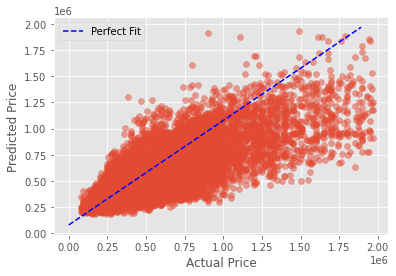

In [61]:
preds = model3.predict(Xc)
fig, ax = plt.subplots()

perfect_line = np.arange(y_target.min(), y_target.max())
ax.plot(perfect_line, linestyle="--", color="blue", label="Perfect Fit")
ax.scatter(y_target, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

Model 3 **passes the linearity assumption**.

### Normality

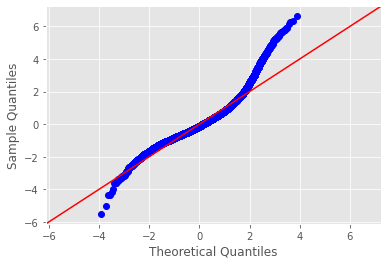

In [62]:
residuals = (y_target - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

Model 3 **does not pass** the normality assumption.

### Homoscedasticity 

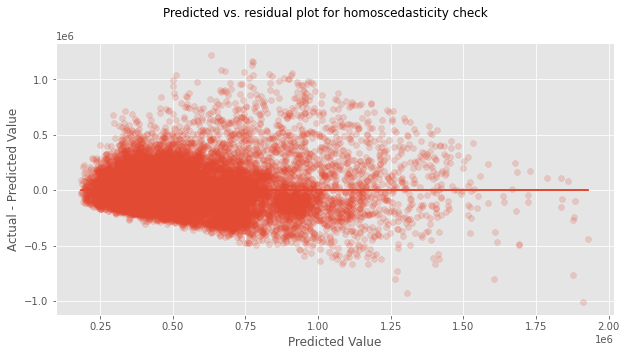

In [63]:
residuals = model3.resid
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle('Predicted vs. residual plot for homoscedasticity check')
ax.scatter(preds, residuals, alpha=0.2)
ax.plot(preds, [0 for i in range(len(Xc))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

In [64]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_target, Xc)
list(zip(name, test))

[('F statistic', 1.0515668499610575), ('p-value', 0.0047042266078121744)]

Model 3 **passes** the homoscedasticity assumption.

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vifs = [vif(Xc.values, i) for i in range(len(Xc.columns))]
pd.Series(data=vifs, index=Xc.columns).sort_values(ascending=False)

const            49.026390
sqft_living       5.853273
bathrooms         2.878051
sqft_living15     2.805704
floors            1.889390
grade_7           1.879711
sqft_basement     1.783474
bedrooms          1.740494
grade_6           1.711180
grade_9           1.514072
grade_10          1.506755
view_4            1.424267
waterfront        1.381906
grade_11          1.347601
grade_12          1.111479
grade_5           1.107698
view_3            1.064812
view_2            1.046664
view_1            1.020083
dtype: float64

Model 3 **does not pass** the independence assumption.

## Model 4

By dropping grade_8 from our model we did not see an increase in our R-squared value. However, we did see an improvement in our independence assumption as all of our new VIF values are <5 (except for sqft_living, which we may need to address). Next we will try to improve our model by addressing the normality assumption by log transforming and scaling our price variable.

In [66]:
pricelog = np.log(features_df['price'])
y_target = (pricelog-np.mean(pricelog))/np.sqrt(np.var(pricelog))
X_features = features_df.drop(['price', 'grade_8'], axis=1)


Xc = add_constant(X_features, has_constant='add')
model4 = sm.OLS(y_target, Xc).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     1453.
Date:                Mon, 29 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:01:33   Log-Likelihood:                -21789.
No. Observations:               21380   AIC:                         4.362e+04
Df Residuals:                   21361   BIC:                         4.377e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.8925      0.032    -27.788      0.000      -0.955      -0.830
bedrooms         -0.0231      0.007     -3.421      0.001      -0.036      -0.010
bathrooms        -0.0455      0.010     -4.356      0.000      -0.066      -0.025
sqft_living       0.0003   1.29e-05     21.722      0.000       0.000       0.000
sqft_living15     0.0002   1.15e-05     14.401      0.000       0.000       0.000
sqft_basement     0.0003   1.43e-05     19.938      0.000       0.000       0.000
floors            0.1198      0.012     10.240      0.000       0.097       0.143
waterfront        0.6669      0.079      8.480      0.000       0.513       0.821
grade_5          -1.0966      0.046    -24.027      0.000      -1.186      -1.007
grade_6          -0.7137      0.020    -34.927      0.000      -0.754      -0.674
grade_7          -0.3415      0.013    -26.797      0.000      -0.366      -0.317
grade_9           0.3922      0.017     22.691      0.000       0.358       0.426
grade_10          0.6647      0.026     25.740      0.000       0.614       0.715
grade_11          0.7840      0.044     17.986      0.000       0.699       0.869
grade_12          0.9261      0.097      9.522      0.000       0.735       1.117
view_1            0.3977      0.038     10.374      0.000       0.323       0.473
view_2            0.2859      0.023     12.406      0.000       0.241       0.331
view_3            0.3254      0.032     10.194      0.000       0.263       0.388
view_4            0.5358      0.051     10.500      0.000       0.436       0.636
==============================================================================
Omnibus:                        5.274   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.991
Skew:                           0.003   Prob(JB):                       0.0824
Kurtosis:                       2.925   Cond. No.                     6.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Normality

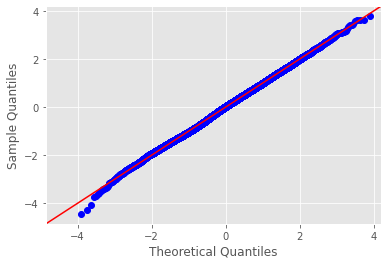

In [67]:
preds = preds = model4.predict(Xc)
residuals = (y_target - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

Model 4 **passes** the normality assumption.

### Homoscedasticity

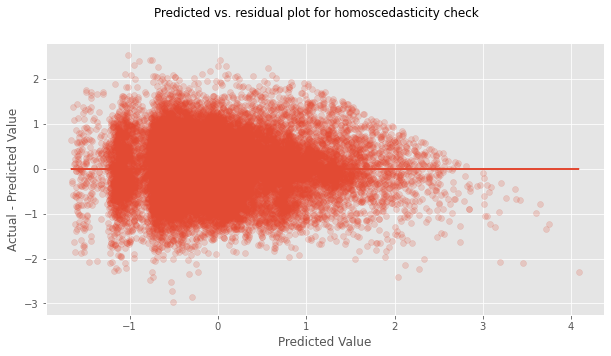

In [68]:
residuals = model4.resid
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle('Predicted vs. residual plot for homoscedasticity check')
ax.scatter(preds, residuals, alpha=0.2)
ax.plot(preds, [0 for i in range(len(Xc))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

In [69]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_target, Xc)
list(zip(name, test))

[('F statistic', 0.943887787094683), ('p-value', 0.9985701123472763)]

Model 4 **does not pass** the homoscedasticity assumption.

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vifs = [vif(Xc.values, i) for i in range(len(Xc.columns))]
pd.Series(data=vifs, index=Xc.columns).sort_values(ascending=False)

const            49.026390
sqft_living       5.853273
bathrooms         2.878051
sqft_living15     2.805704
floors            1.889390
grade_7           1.879711
sqft_basement     1.783474
bedrooms          1.740494
grade_6           1.711180
grade_9           1.514072
grade_10          1.506755
view_4            1.424267
waterfront        1.381906
grade_11          1.347601
grade_12          1.111479
grade_5           1.107698
view_3            1.064812
view_2            1.046664
view_1            1.020083
dtype: float64

## Final Model

In Model 4 we saw an improvement in our normality assumption as our Q-Q plot was nearly perfect. However, as a result of our log transformation, we saw a decrease in our R-squared to 55.1 percent and we failed our homoscedasticity and independence test. In our final iteration. we will revist our third model that was not log transformed. Additionally, we will drop sqft_living from our model so that all of our VIF values are <5.

In [71]:
y_target = features_df['price']
X_features = features_df.drop(['price', 'sqft_living', 'grade_8'], axis=1)


Xc = add_constant(X_features, has_constant='add')
model5 = sm.OLS(y_target, Xc).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     1690.
Date:                Mon, 29 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:01:34   Log-Likelihood:            -2.8977e+05
No. Observations:               21380   AIC:                         5.796e+05
Df Residuals:                   21362   BIC:                         5.797e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           2.51e+05   8885.157     28.254      0.000    2.34e+05    2.68e+05
bedrooms       1.072e+04   1736.121      6.174      0.000    7315.535    1.41e+04
bathrooms      8558.5602   2757.859      3.103      0.002    3152.950     1.4e+04
sqft_living15    62.5781      2.884     21.699      0.000      56.925      68.231
sqft_basement   113.2664      3.624     31.250      0.000     106.162     120.371
floors           3.2e+04   3220.539      9.938      0.000    2.57e+04    3.83e+04
waterfront     2.678e+05   2.18e+04     12.263      0.000    2.25e+05    3.11e+05
grade_5       -1.751e+05   1.27e+04    -13.839      0.000      -2e+05    -1.5e+05
grade_6        -1.31e+05   5650.788    -23.174      0.000   -1.42e+05    -1.2e+05
grade_7       -8.296e+04   3517.264    -23.587      0.000   -8.99e+04   -7.61e+04
grade_9        1.676e+05   4663.827     35.940      0.000    1.58e+05    1.77e+05
grade_10        3.47e+05   6801.838     51.010      0.000    3.34e+05     3.6e+05
grade_11       5.184e+05   1.16e+04     44.876      0.000    4.96e+05    5.41e+05
grade_12       7.732e+05   2.65e+04     29.174      0.000    7.21e+05    8.25e+05
view_1         1.259e+05   1.06e+04     11.826      0.000    1.05e+05    1.47e+05
view_2         8.674e+04   6399.530     13.554      0.000    7.42e+04    9.93e+04
view_3         1.369e+05   8864.640     15.440      0.000    1.19e+05    1.54e+05
view_4         2.219e+05   1.42e+04     15.663      0.000    1.94e+05     2.5e+05
==============================================================================
Omnibus:                     5067.876   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18282.283
Skew:                           1.163   Prob(JB):                         0.00
Kurtosis:                       6.887   Cond. No.                     4.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Linearity

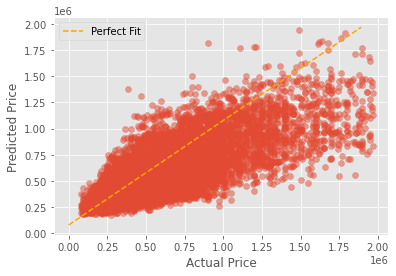

In [72]:
preds = model5.predict(Xc)
fig, ax = plt.subplots()

perfect_line = np.arange(y_target.min(), y_target.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_target, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

Final Model **passes** linearity assumption.

### Normality

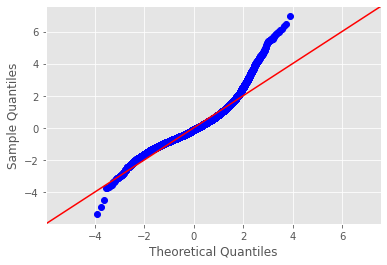

In [73]:
residuals = (y_target - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

Final Model **does not pass** normality assumption.

### Homoscedasticity

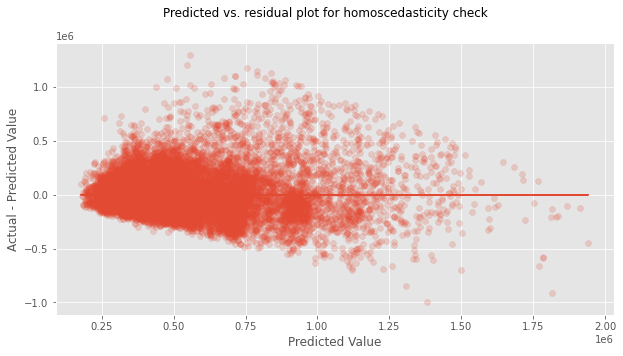

In [74]:
residuals = model5.resid
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle('Predicted vs. residual plot for homoscedasticity check')
ax.scatter(preds, residuals, alpha=0.2)
ax.plot(preds, [0 for i in range(len(Xc))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

In [75]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_target, Xc)
list(zip(name, test))

[('F statistic', 1.0682545233035483), ('p-value', 0.00032477597229679887)]

Final Model **passes** homoscedasticity assumption.

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vifs = [vif(Xc.values, i) for i in range(len(Xc.columns))]
pd.Series(data=vifs, index=Xc.columns).sort_values(ascending=False)

const            48.642661
bathrooms         2.606534
sqft_living15     2.284157
grade_7           1.856405
floors            1.856070
grade_6           1.696662
bedrooms          1.497326
sqft_basement     1.481217
grade_9           1.429240
view_4            1.424161
waterfront        1.381816
grade_10          1.355246
grade_11          1.226970
grade_5           1.103404
grade_12          1.070151
view_3            1.064791
view_2            1.046658
view_1            1.020059
dtype: float64

Final Model **passes** independance assumption.

## Results
In our final regression model using all of our selected features except `sqft_living` and `grade_8`, we saw an increase in model performance based on our R-squared value from 46.1 percent (baseline) to 57.4 percent (final). All model features had a p-value < 0.05 (our alpha/significance level), which tells us that all features have a statistically significant linear relationship with price. While we did not pass our normality assumption in our final model we did pass our independence, linearity, and homoscedasticity assumptions, which is good. Here are some observations from our chosen model:
 
* With each additional bathroom added you can increase the home sale price by 8,500 dollars.
* With each additional bedroom added you can increase the home sale price by 10,700 dollars.
* Homes on a waterfront see an increase in property value of 267,800 dollars.
* Homes that are considered to have a 'fair' view sell for 125,900 dollars more than those with no view.
* Homes that are considered to have an 'excellent' view sell for 221,900 dollars more than those with no view.
* With each additional floor added you can increase the home sale price by 32,000.
* Building grade and sqft_living had the strongest positive correlations with home sale price.

## Recommendations
1. Find an area to develop that has at least what is considered a 'fair' view. Homes built on these lots will see an increase in sale price of around 126,000 dollars.
2. Homes on a waterfront see a bigger increase in value than most other features. Building a house on a waterfront sees an increase in sale price of around 268,000 dollars. 
3. Do not cut costs on building materials, building grade is highly correlated to house sale price. Most houses are built with an "average" grade. Start building with at least a "better" grade to increase sale price.

## Limitations and Futher Analysis

Our model accurately fits only 57.4 percent of the data. While this is sufficient enough to make observations and insights, conclusions should be approached with caution. Additionally, a test for normality failed in our final model, which is one of the assumptions for linear regression. Further exploration into the normalization and scaling of features might help pass that assumption. Future analysis and modeling might want to consider a couple of items:

1. Find more recent home sales data to get a more accurate picture of today's market. Finding home sale information before 2014 would also help to create a more in-depth analysis.
2. Include additional features in future models. Particularly zipcode, sqft_living, and condition.